# python包sympy在物理工程和数学的应用导论

In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction
设定一个变量x如下

In [2]:
x=smp.symbols('x')
x

x

In [12]:
print(x **2)
print(smp.cos(x))
y=smp.sin(x)
y

x**2
cos(x)


sin(x)

## 复习：这样利用sympy就可以构建很多方程了

In [36]:
y=x**2+4*x+3
print(y)

z=y**2
print(z)

#因式分解
fac=z.factor()
print(fac)

#扩展多项式
expd=z.expand()
print(expd)

z.as_poly()

x**2 + 4*x + 3
(x**2 + 4*x + 3)**2
(x + 1)**2*(x + 3)**2
x**4 + 8*x**3 + 22*x**2 + 24*x + 9


Poly(x**4 + 8*x**3 + 22*x**2 + 24*x + 9, x, domain='ZZ')

使用 ```smp.solve(f,x)``` 时，总会去找所有使得函数$f(x)=0$的解

In [38]:
#解方程  注意 五次多项式以上无根式解
smp.solve(z,x) 

[-3, -1]

In [39]:
smp.solve(smp.sin(x),x)

[0, pi]

### 注：在整个后期方程的变化变得复杂之前，如果能够定义变量的数据类型就尽早定义，否则后期复杂操作会导致sympy挤满内存造成内存泄露

In [50]:
x=smp.symbols('x')
res =smp.solve(x**2+1,x) 
print(res)
x=smp.symbols('x',real=True)
res=smp.solve(x**2+1,x) 
print(res) 

[-I, I]
[]


In [51]:
x=smp.symbols('x',real=True )
res =smp.solve(x +4,x) 
print(res)
#注意这里指定了正数，该正负指定对于虚数i无用
x=smp.symbols('x',real=True,positive=True)
res =smp.solve(x +4,x) 
print(res)

[-4]
[]


可指定多个变量

In [4]:
x,y,z=smp.symbols('x y z')
F= x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

In [65]:
#此时需要寻找F=0的x的解 使用 yz表达
x_sols=smp.solve(F,x)
print(x_sols)
y_sols=smp.solve(F,y)
print(y_sols)
z_sols=smp.solve(F,z)
print(z_sols)

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]
[-x**2/sin(z)]
[asin(x**2/y) + pi, -asin(x**2/y)]


然后把方程转为数值函数，在matplot上显示出来

In [69]:
expr= z_sols[0]
print(expr)
#给予函数一组变量数字用以计算
expr_f=smp.lambdify([x,y],expr)
expr_f(1,2) 

asin(x**2/y) + pi


3.6651914291880923

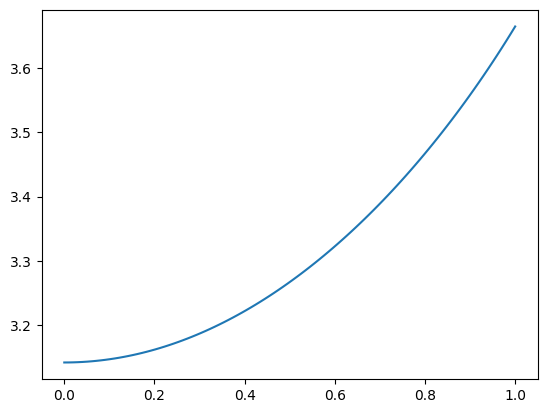

In [74]:
x_num=np.linspace(0,1,100)
y_num=2
plt.plot(x_num,expr_f(x_num,y_num))
plt.show()

多元方程可以对变量做赋值，甚至于替换变量

In [5]:
print(F)
res=F.subs([(y,smp.cos(z))])
print(res)
res=F.subs([(y,smp.cos(z)),(z,smp.pi/2)])
print(res)

x**2 + y*sin(z)
x**2 + sin(z)*cos(z)
x**2


## 样例
一个下落的物体，和一个平台，都在重力加速度影响下下落，其方程如下
\
Object:$h_o(t)=h_0-v_0t-\frac12gt^2$
\
Platform:$h_p(t)=v_pt+\frac12qt^2$
\
找出一个初始速度 $v_0$ 使得物体和平台在等速的时候相撞；
\
根据条件碰撞时高度相同，速度也相同，那么我们要解开两个联立的等式：\
$h_o(t)=h_p(t)$\
$\frac{dh_0}{d_t}(t)=-\frac{dh_p}{dt}(t)$\
由于在sympy中是右侧为0的方程解法，那么处理一下\
$h_o(t)-h_p(t)=0$\
$\frac{dh_0}{d_t}(t)+\frac{dh_p}{dt}(t)=0$\
\
那么可以开始编程

In [6]:
t,h0,v0,g,vp,q=smp.symbols('t h_0 v_0 g v_p q',real=True,positive=True)


In [9]:
#Rational表达严格数学上的分数含义 而非计算机的除法  可保证精度
h0t=h0-v0*t-smp.Rational(1,2)*g*t**2
dh0_dt=g*t-v0
hpt=vp*t+smp.Rational(1,2)*g*t**2
dhp_dt=vp+q*t

In [10]:
eq1=h0t-hpt
eq2=dh0_dt+dhp_dt

In [11]:
#连立方程解法   并取出第一对解
t_collide,v_initfall=smp.solve([eq1,eq2],[t,v0])[0]

In [13]:
smp.solve([eq1,eq2],[t,v0])[0][0]

(g*v_p/(2*g + q) - v_p - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q))/(g + q)

In [14]:
v_initfall

g*v_p/(2*g + q) - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q)

In [15]:
dh0_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-2*g*v_p + q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)

In [17]:
dhp_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(2*g*v_p - q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)

# 微积分 第一年

In [3]:
x=smp.symbols('x')

## 极限
$$
\lim\limits_{x\to\pi}\sin(\frac x2+\sin x)
$$

In [5]:
expr_lim = smp.sin(x/2+smp.sin(x))
smp.limit(expr_lim,x,smp.pi)

1

## 微分
$$
\frac d{dx}(\frac{1+\sin x}{1-\cos x})^2
$$

In [14]:
expr_diff=((1+smp.sin(x))/(1-smp.cos(x)))**2
smp.diff(expr_diff,x) 

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$
\frac d{dx} f(x+g(x))
$$

In [15]:
f,g = smp.symbols('f g',cls=smp.Function)
g=g(x)
f=f(x+g)

In [16]:
f

f(x + g(x))

In [17]:
dfdx=smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [21]:
#对式子内任意组分的替换
dfdx.subs([(g,smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [20]:
##对式子内任意组分的替换 并简化
dfdx.subs([(g,smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## 不定积分/反导函数
$$
\int \csc x \cot x dx
$$


In [30]:
func_antidiff=smp.csc(x)*smp.cot(x)
smp.integrate(func_antidiff,x) 

-1/sin(x)

## 定积分
$$
\int _0^{\ln4}\frac{e^x }{\sqrt{e^{2x}+9}}dx
$$

In [31]:
expr_defInt=(smp.exp(x))/(smp.sqrt(smp.exp(2*x)+9))
smp.integrate(expr_defInt,(x,0,smp.ln(4)))

-asinh(1/3) + asinh(4/3)

$$
\int_1^t x^{10}e^xdx
$$

In [34]:
t=smp.symbols('t')
expr_defint=x**10*smp.exp(x)
smp.integrate(expr_defint,(x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## 用例
量子力学中,氢原子的波函数描述了氢原子周围电子的分布态，大概几率位置,如下\
$$
\Psi_{nlm}=R_{nl}(r)Y_i^m(\theta,\phi)
$$
\
是个球谐函数
\
$$
R_{nl}(r)=\sqrt{{(\frac2{na})^2}\frac{(n-l-1)!}{2n[(n+1)!]}}e^{-\frac r{na}}(\frac2{na})^l[L_{n-l-1}^{2l+1}(2rlna)]
$$
\
a为常数波尔半径，n l 都是整数 表达电子所在壳层，和角动量有关，r就是半径距离，L则为多项式
\
由此寻找原子核距离电子的平均距离
\
$$
\langle r \rangle=\int R_{nl}^2 r^3 dr
$$
\
该距离散布的几率标准差为
\
$$
\sigma = \sqrt{ \langle r^2 \rangle -\langle r \rangle ^2 }=\sqrt{ (\int_0^\infty R^2_{nl} r^4 dr)-(\int_0^\infty R^2_{nl}r^3dr)^2 }
$$



In [35]:
from sympy import assoc_laguerre

定义变量，确定其数据类型

In [38]:
r,a=smp.symbols('r a',real=True,positive=True)
n,l=smp.symbols('n l',integer=True,positive=True)

定义$R_{nl}(r)$

In [64]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R


2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

然后需要确认我们的方程是否符合原来的式子，来寻找氢原子的基态径向函数，来看看 $R_{10}(r)$

In [65]:
R_10=R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

接下来写出 $\int_0^\infty R^2_{nl}r^k dr$ 函数,变量为 n l k ,k为指数

In [66]:
def compute_int(n_val,l_val,k):
    R_nl=R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2*r**k,(r,0,smp.oo))

那么在$\psi_{100}$平均的电子距离为

In [67]:
compute_int(n_val=3,l_val=1,k=3)

25*a/2

$\psi_{100}$时标准差

smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

那么在$\psi_{420}$平均的电子距离，一般来说，如果电子和原子距离固定旋转，那么不存在扩散，也就不会有方差标准差出现                  

In [70]:
compute_int(n_val=4,l_val=2,k=3)

21*a

## 多元微积分

In [78]:
x,y,z,u1,u2,u3,v1,v2,v3,t = smp.symbols('x y z u1 u2 u3 v1 v2 v3 t')

In [79]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [80]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

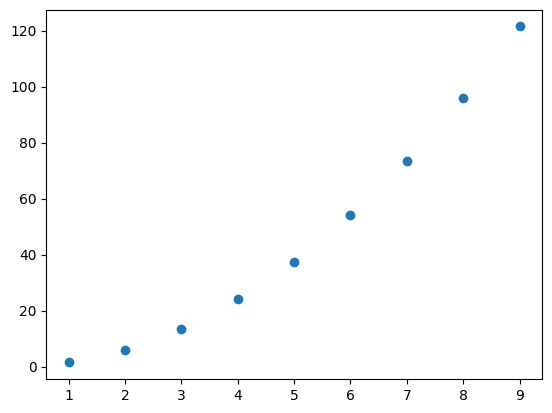

In [81]:
plt.scatter(ns, ds)

### 向量和几何

In [73]:
u=smp.Matrix([u1,u2,u3])
v=smp.Matrix([v1,v2,v3])